## 1. Import Featurs and Load Datasets

In [2]:
# Install custom made package
pip install -i https://test.pypi.org/simple/ my_krml_ratana

Looking in indexes: https://test.pypi.org/simple/
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df_train = pd.read_csv('../data/interim/train_cleaned_1.csv')

In [5]:
df_test = pd.read_csv('../data/interim/test_cleaned_1.csv')

In [6]:
df_test.shape

(4970, 61)

In [7]:
df_train.head()

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
0,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,...,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,b2716b2d-3422-4959-9fe7-fe496414a4e8,0.0
1,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,...,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,bb387960-e3a0-4ffd-96ae-184bad07cb8a,0.0
2,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,...,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,89bbdf11-eadd-4de4-95e5-03f7e2874aa1,0.0
3,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,...,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,0c87ada8-8446-4ea2-a05b-bd07aed5f37a,0.0
4,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,...,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,84661e00-ad20-4308-817e-efa8da52a86c,0.0


In [8]:
df_train.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
team,46221,355,Army,176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
conf,46221,36,ACC,1859,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GP,46221.0,NaN,NaN,NaN,23.698752,9.963262,1.0,17.0,28.0,31.0,41.0
Min_per,46221.0,NaN,NaN,NaN,37.638995,27.943755,0.0,10.2,36.3,62.4,98.0
Ortg,46221.0,NaN,NaN,NaN,92.097021,29.548798,0.0,84.2,97.1,106.8,834.0
...,...,...,...,...,...,...,...,...,...,...,...
stl,46221.0,NaN,NaN,NaN,0.53108,0.469492,0.0,0.1613,0.4242,0.7941,4.0
blk,46221.0,NaN,NaN,NaN,0.285569,0.423686,0.0,0.0,0.1333,0.3667,5.2581
pts,46221.0,NaN,NaN,NaN,5.771264,4.940183,0.0,1.5769,4.4839,9.0769,29.9688
player_id,46221,20121,f187104c-e2f0-4f5f-809d-553c4f677003,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. EDA

In [9]:
df_cleaned = df_train.copy()

In [10]:
# Select numeric column and catagorical
num_cols = list(df_cleaned.select_dtypes('number').columns)
cat_cols = list(set(df_cleaned.columns) - set(num_cols))

In [11]:
num_cols

['GP',
 'Min_per',
 'Ortg',
 'usg',
 'eFG',
 'TS_per',
 'ORB_per',
 'DRB_per',
 'AST_per',
 'TO_per',
 'FTM',
 'FTA',
 'FT_per',
 'twoPM',
 'twoPA',
 'twoP_per',
 'TPM',
 'TPA',
 'TP_per',
 'blk_per',
 'stl_per',
 'ftr',
 'ht',
 'porpag',
 'adjoe',
 'pfr',
 'Rec_Rank',
 'ast_tov',
 'rimmade',
 'rimmade_rimmiss',
 'midmade',
 'midmade_midmiss',
 'rim_ratio',
 'mid_ratio',
 'dunksmade',
 'dunksmiss_dunksmade',
 'dunks_ratio',
 'pick',
 'drtg',
 'adrtg',
 'dporpag',
 'stops',
 'bpm',
 'obpm',
 'dbpm',
 'gbpm',
 'mp',
 'ogbpm',
 'dgbpm',
 'oreb',
 'dreb',
 'treb',
 'ast',
 'stl',
 'blk',
 'pts',
 'drafted']

In [12]:
cat_cols

['yr', 'conf', 'type', 'player_id', 'team']

In [13]:
# Select numeric column and catagorical
num_cols = list(df_cleaned.select_dtypes('number').columns)
cat_cols = list(set(df_cleaned.columns) - set(num_cols))

In [14]:
cat_cols

['yr', 'conf', 'type', 'player_id', 'team']

In [15]:
df_cleaned[num_cols].describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
GP,46221.0,23.698752,9.963262,1.000000,17.000000,28.000000,31.000000,41.00000
Min_per,46221.0,37.638995,27.943755,0.000000,10.200000,36.300000,62.400000,98.00000
Ortg,46221.0,92.097021,29.548798,0.000000,84.200000,97.100000,106.800000,834.00000
usg,46221.0,18.194215,6.108477,0.000000,14.600000,18.100000,21.800000,50.00000
eFG,46221.0,44.603987,17.719240,0.000000,40.200000,47.600000,53.100000,150.00000
TS_per,46221.0,47.756077,16.884878,0.000000,43.960000,50.770000,55.960000,150.00000
ORB_per,46221.0,5.640871,9.759361,0.000000,1.900000,4.500000,8.300000,1576.60000
DRB_per,46221.0,12.592196,10.873136,0.000000,8.400000,11.800000,15.900000,1385.00000
AST_per,46221.0,10.961221,9.343560,0.000000,4.700000,9.200000,15.300000,100.00000
TO_per,46221.0,20.569776,12.022712,0.000000,15.000000,19.300000,24.700000,100.00000


In [16]:
df_cleaned['drafted'].value_counts()

drafted
0.0    45777
1.0      444
Name: count, dtype: int64

There is a class imbalance with class 1 representing 1% of the dataset

In [17]:
df_cleaned[cat_cols]

,yr,conf,type,player_id,team
0,So,SB,all,b2716b2d-3422-4959-9fe7-fe496414a4e8,South Alabama
1,So,WAC,all,bb387960-e3a0-4ffd-96ae-184bad07cb8a,Utah St.
2,Sr,BE,all,89bbdf11-eadd-4de4-95e5-03f7e2874aa1,South Florida
3,Sr,WCC,all,0c87ada8-8446-4ea2-a05b-bd07aed5f37a,Pepperdine
4,Sr,BW,all,84661e00-ad20-4308-817e-efa8da52a86c,Pacific
...,...,...,...,...,...
46216,Sr,MVC,all,7da0b8f8-3582-496b-9a93-a4e76e073650,Southern Illinois
46217,So,SWAC,all,523630b3-3155-47a5-b214-299e8117913d,Texas Southern
46218,Jr,Sum,all,9818a0c6-2ceb-4e55-9483-76c177322f3c,Western Illinois
46219,So,MAC,all,3237ee2e-9cf8-4d6b-a348-b5619804afd7,Northern Illinois


In [18]:
df_test

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id
0,Morgan St.,MEAC,2,3.0,115.1,4.7,50.0,50.00,0.0,4.6,...,-2.467740,-2.275660,0.0000,0.3333,0.3333,0.0000,0.0000,0.0000,1.0000,23549e01-c1b3-4ca0-a0fd-de9b5d76276b
1,South Carolina St.,MEAC,11,17.6,61.1,18.6,34.7,35.18,2.5,15.7,...,-7.494720,-4.412530,0.2727,1.4545,1.7273,0.4545,0.1818,0.0000,2.3636,52a518bb-b34a-4b43-adee-5e996cb853fa
2,Binghamton,AE,9,28.6,91.9,23.8,54.1,52.49,6.4,22.5,...,-2.924950,1.717890,1.3333,4.4444,5.7778,1.0000,0.6667,1.8889,8.8889,ad3d9117-b6bf-4675-ab97-3497acf3e555
3,Illinois,B10,7,1.3,111.0,10.4,83.3,83.33,0.0,13.4,...,-0.767911,0.962469,0.0000,0.2857,0.2857,0.0000,0.0000,0.0000,0.7143,eaf66a5c-6f4c-4070-bc70-a99d731b3740
4,Iowa St.,B12,23,78.5,103.1,21.5,54.0,56.12,3.6,10.2,...,2.893610,-1.019000,1.0435,2.8696,3.9130,1.1739,0.8261,0.0870,14.3043,55d07491-5bd1-447f-844e-9cb36eaa442e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4965,Villanova,BE,2,0.3,60.5,19.3,0.0,0.00,0.0,0.0,...,2.143290,16.018200,0.0000,0.0000,0.0000,0.5000,0.5000,0.0000,0.0000,28222513-8a1f-4a48-8fde-16888e9e11ce
4966,Northwestern St.,Slnd,4,1.3,28.3,7.1,0.0,0.00,7.0,0.0,...,-7.242230,-4.993820,0.2500,0.0000,0.2500,0.0000,0.0000,0.0000,0.0000,c32a466d-7a66-47eb-805c-a94e328261bc
4967,Tulane,Amer,1,0.1,0.0,0.0,0.0,0.00,0.0,0.0,...,-3.524820,-1.126810,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,55f0ddef-9f29-47ae-87b5-da43c687d25c
4968,Texas Tech,B12,1,0.1,0.0,0.0,0.0,0.00,0.0,0.0,...,-1.876040,-2.380750,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,460d6a42-5dbc-48f0-bc94-3650da83f345


In [17]:
num_cols

['GP',
 'Min_per',
 'Ortg',
 'usg',
 'eFG',
 'TS_per',
 'ORB_per',
 'DRB_per',
 'AST_per',
 'TO_per',
 'FTM',
 'FTA',
 'FT_per',
 'twoPM',
 'twoPA',
 'twoP_per',
 'TPM',
 'TPA',
 'TP_per',
 'blk_per',
 'stl_per',
 'ftr',
 'ht',
 'porpag',
 'adjoe',
 'pfr',
 'Rec_Rank',
 'ast_tov',
 'rimmade',
 'rimmade_rimmiss',
 'midmade',
 'midmade_midmiss',
 'rim_ratio',
 'mid_ratio',
 'dunksmade',
 'dunksmiss_dunksmade',
 'dunks_ratio',
 'pick',
 'drtg',
 'adrtg',
 'dporpag',
 'stops',
 'bpm',
 'obpm',
 'dbpm',
 'gbpm',
 'mp',
 'ogbpm',
 'dgbpm',
 'oreb',
 'dreb',
 'treb',
 'ast',
 'stl',
 'blk',
 'pts',
 'drafted']

In [6]:
from my_krml_ratana.features.plots import create_countplot

In [20]:
from my_krml_ratana.features.plots import histogram_boxplot

In [7]:
create_countplot

<function cstm_pkg_grp_9.features.plots.create_countplot(df, target_col, hue=None, x_label_tilt=False)>

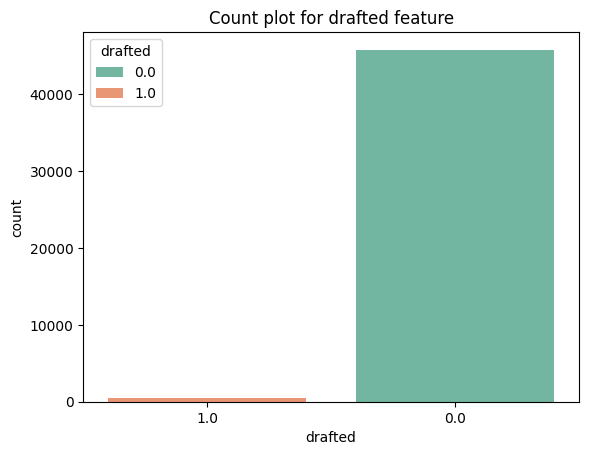

In [18]:
create_countplot(df_cleaned, 'drafted', hue='drafted')

C:\Users\sovan\AppData\Local\pypoetry\Cache\virtualenvs\assignment1-2FZe505k-py3.12\Lib\site-packages\cstm_pkg_grp_9\features\plots.py:178: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


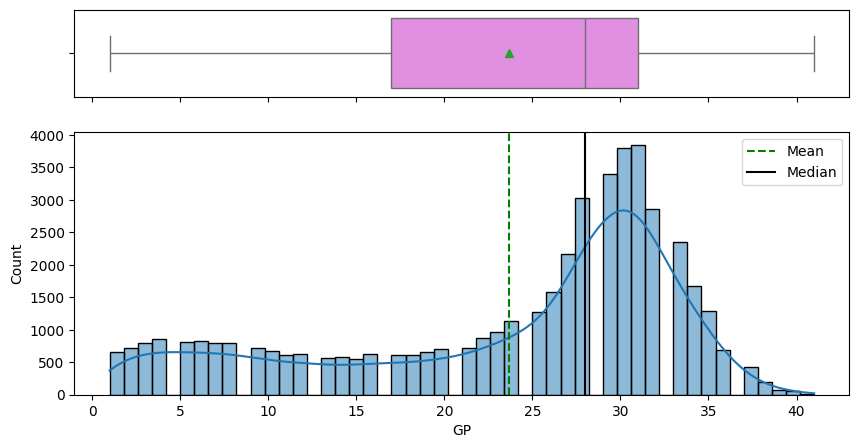

In [23]:
# Distribution of Game Played
histogram_boxplot(df_cleaned, num_cols[0], bins=50, kde=True, figsize=(10, 5))

Number of games played (GP) is left skewed with many outliers on the left (play little games)

C:\Users\sovan\AppData\Local\Temp\ipykernel_23304\996613566.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


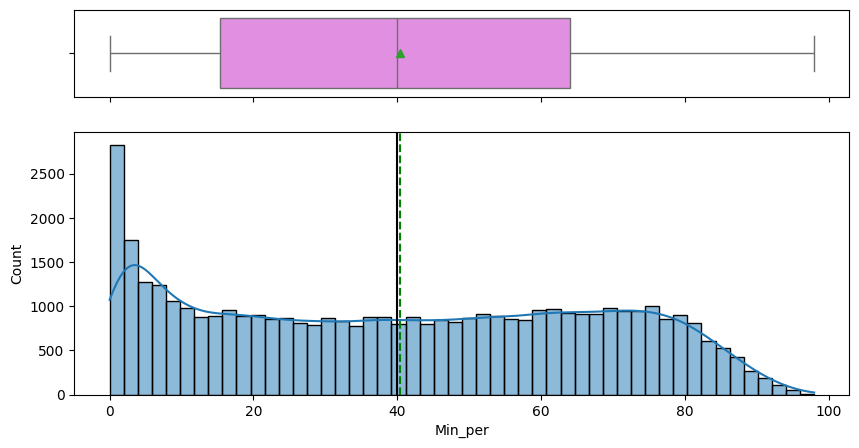

In [23]:
# Distribution of min played
histogram_boxplot(df_cleaned, num_cols[1], bins=50, kde=True, figsize=(10, 5))

+ There seems to be a lot of players that average 0 to 5 min per game time. The rest is more evenly spread out

C:\Users\sovan\AppData\Local\Temp\ipykernel_23304\996613566.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


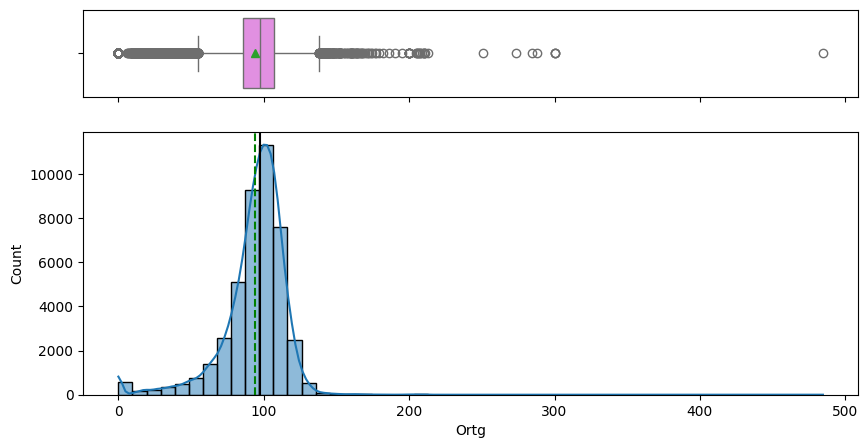

In [24]:
# Distribution of Offensive rating
histogram_boxplot(df_cleaned, num_cols[2], bins=50, kde=True, figsize=(10, 5))

+ There are a lot of outliers in the Ortg data that are somewhat unrealistic

In [25]:
# Examine outliers
pd.set_option('display.max_rows', 50)
df_cleaned[df_cleaned['Ortg'] > 150]

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
565,East Carolina,CUSA,7,1.0,153.0,14.7,150.0,128.21,0.0,10.3,...,4.855690,0.0000,0.1429,0.1429,0.1429,0.1429,0.0000,0.7143,3096adce-acb9-46e1-b077-d0f8751efe46,0.0
5195,West Virginia,BE,20,5.0,151.0,13.9,67.4,68.89,1.4,6.1,...,0.373295,0.0500,0.2000,0.2500,0.2500,0.0000,0.0500,1.6500,374546e5-a79c-4645-b1f1-0dab6b5c8761,0.0
7089,Louisiana Tech,WAC,8,1.1,163.7,21.3,112.5,101.38,0.0,37.7,...,20.678200,0.0000,0.6250,0.6250,0.2500,0.5000,0.0000,1.3750,37408d10-934f-43fd-a96b-1a6bca47ae04,0.0
8085,Kansas,B12,13,5.0,151.8,14.9,81.3,80.16,1.6,11.0,...,4.750270,0.0769,0.6154,0.6923,0.3077,0.3846,0.0769,3.0769,915b816a-d22e-40c4-9da1-897bf68d86ba,0.0
9799,Miami FL,ACC,5,0.6,157.5,17.6,150.0,150.00,0.0,0.0,...,-0.521327,0.0000,0.0000,0.0000,0.4000,0.0000,0.0000,0.6000,6f06ef0d-a945-4c1a-b2c2-8a00cdee9401,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41894,Portland St.,BSky,6,0.4,300.0,4.6,150.0,150.00,0.0,24.2,...,0.280051,0.0000,0.5556,0.5556,0.0000,0.4444,0.1111,2.6667,57f22424-0bc9-4648-ae1f-6b24f5d7a702,0.0
42185,UAB,CUSA,9,1.4,160.0,10.4,125.0,125.00,7.4,12.9,...,1.828160,0.1000,0.2000,0.3000,0.2000,0.1000,0.0000,0.7000,1db38742-9d96-471f-9faf-50c082510a45,0.0
42400,Georgia St.,SB,11,1.0,205.2,7.0,100.0,100.00,0.0,7.8,...,0.282661,0.0000,0.1538,0.1538,0.0769,0.0000,0.0000,0.5385,eed852a7-431a-412a-ab7d-fd9721cef2a1,0.0
42422,Miami OH,MAC,5,0.3,300.0,5.0,150.0,150.00,0.0,0.0,...,2.325470,0.2857,0.0000,0.2857,0.2857,0.0000,0.0000,0.5714,2429cbbb-742c-461d-a925-bb30e6273216,0.0


+ It seems the outliers with ORtg is associated with outliers game played as well. Could potentially be removed to see if model prediction improve

C:\Users\sovan\AppData\Local\Temp\ipykernel_23304\996613566.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


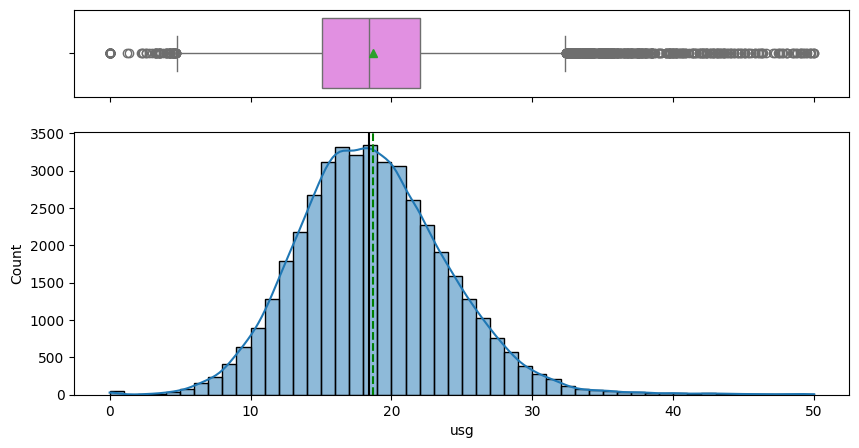

In [26]:
# Distribution of Offensive rating
histogram_boxplot(df_cleaned, num_cols[3], bins=50, kde=True, figsize=(10, 5))

The data is slightly right skewed 

C:\Users\sovan\AppData\Local\Temp\ipykernel_23304\996613566.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


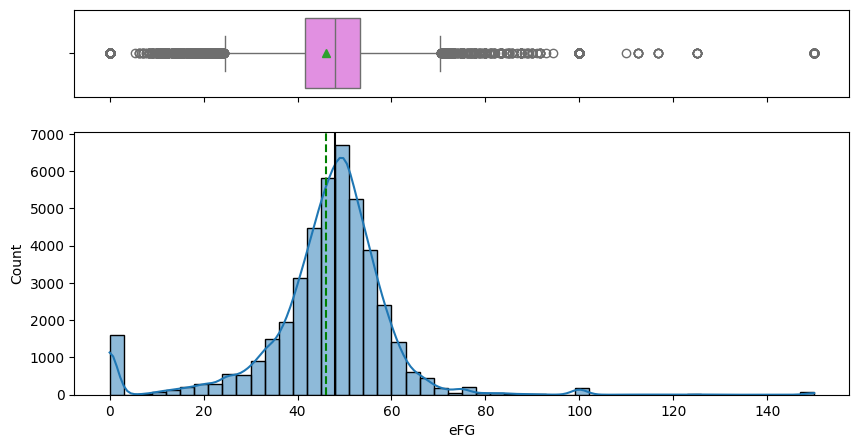

In [27]:
# Distribution of Effective field goal rating
histogram_boxplot(df_cleaned, num_cols[4], bins=50, kde=True, figsize=(10, 5))

+ Effective field goal is rightly skewed with many positive outliers.

C:\Users\sovan\AppData\Local\Temp\ipykernel_23304\996613566.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


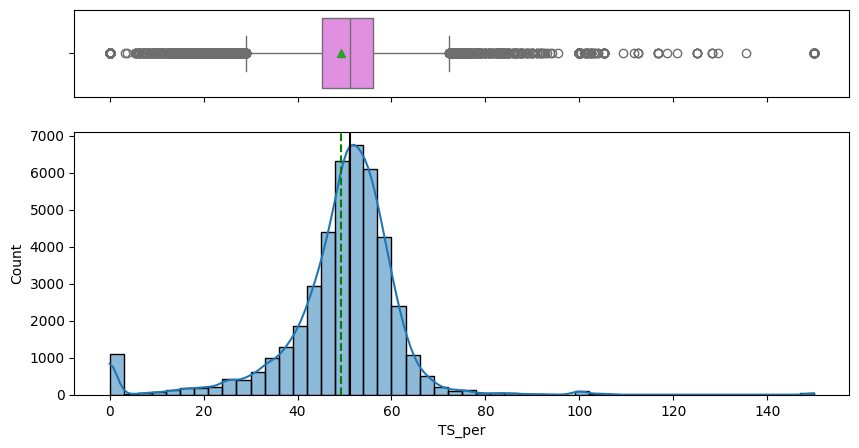

In [28]:
# Distribution of True shooting percentage
histogram_boxplot(df_cleaned, num_cols[5], bins=50, kde=True, figsize=(10, 5))

+ Distribution of TS_per suspiciously mimic eFG. Might create issue of collinearity

C:\Users\sovan\AppData\Local\Temp\ipykernel_23304\996613566.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


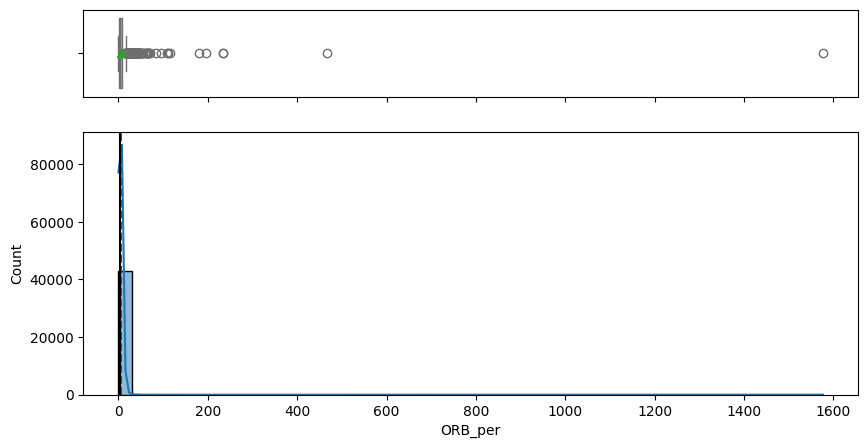

In [29]:
# Distribution of True shooting percentage
histogram_boxplot(df_cleaned, num_cols[6], bins=50, kde=True, figsize=(10, 5))

+ Offensive rebound percentage is heavily right skewed. 

C:\Users\sovan\AppData\Local\Temp\ipykernel_23304\996613566.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


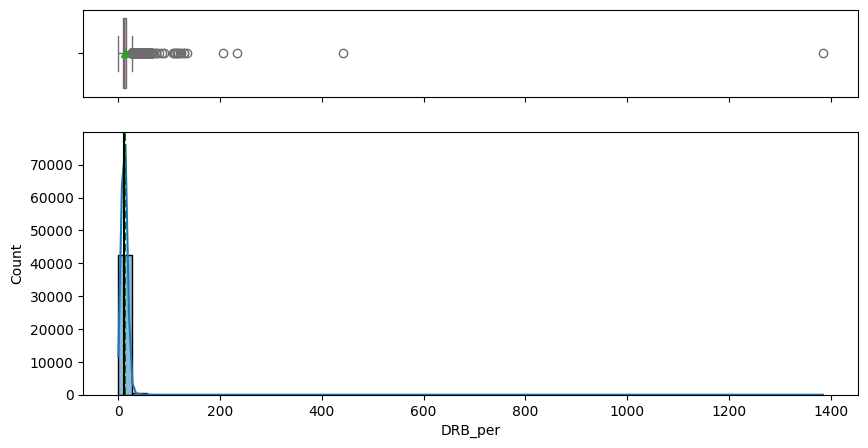

In [30]:
# Distribution of Defensive rebound percentage
histogram_boxplot(df_cleaned, num_cols[7], bins=50, kde=True, figsize=(10, 5))

+ DRB_per is also right skewed

C:\Users\sovan\AppData\Local\Temp\ipykernel_23304\996613566.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


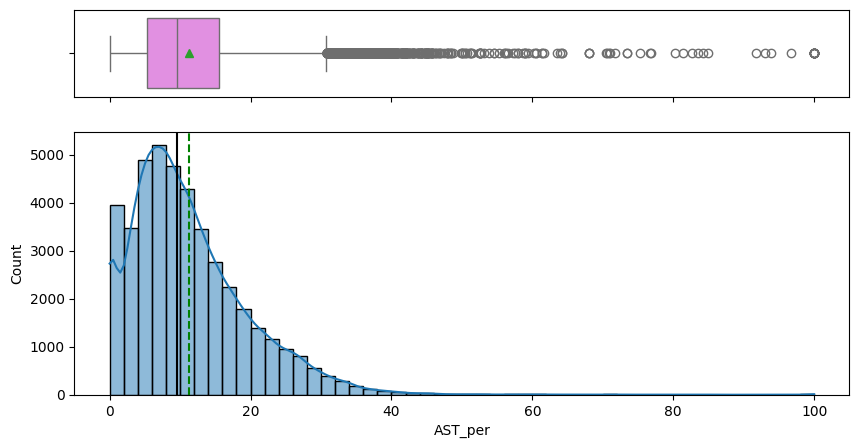

In [31]:
# Distribution of Assist percentage
histogram_boxplot(df_cleaned, num_cols[8], bins=50, kde=True, figsize=(10, 5))

+ AST_per is right skewed with many positive outliers

C:\Users\sovan\AppData\Local\Temp\ipykernel_23304\996613566.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


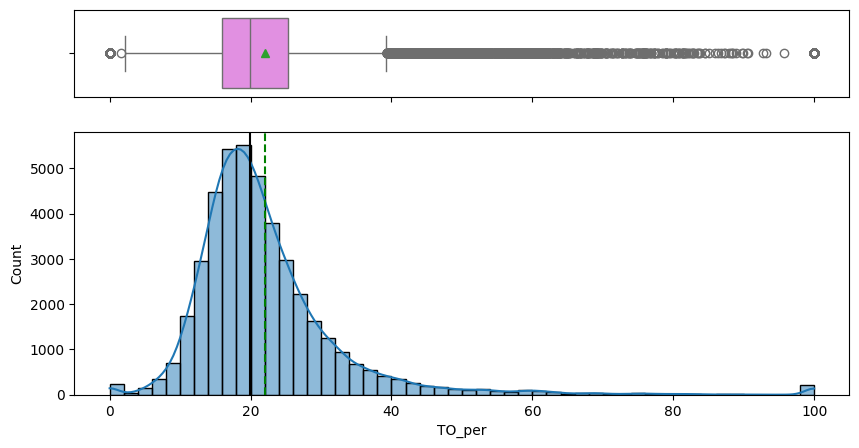

In [32]:
# Distribution of Assist percentage
histogram_boxplot(df_cleaned, num_cols[9], bins=50, kde=True, figsize=(10, 5))

C:\Users\sovan\AppData\Local\Temp\ipykernel_23304\996613566.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


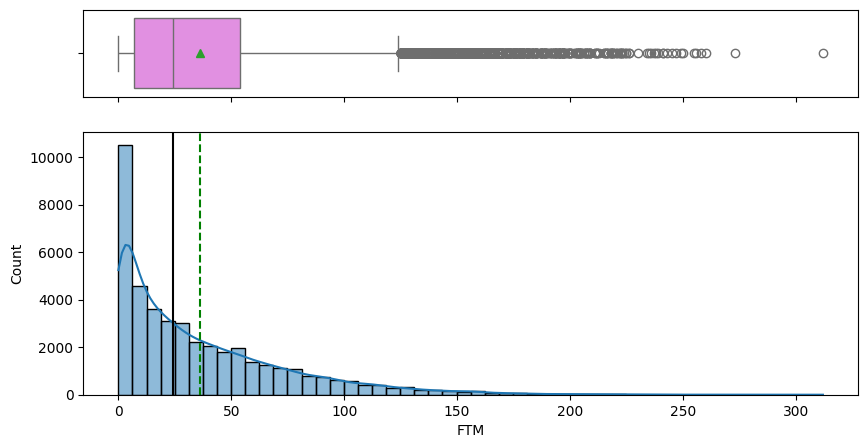

In [33]:
# Distribution of Free Throws Made
histogram_boxplot(df_cleaned, num_cols[10], bins=50, kde=True, figsize=(10, 5))

+ Free throws are also rightly skewd with many positive outliers

C:\Users\sovan\AppData\Local\Temp\ipykernel_23304\996613566.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


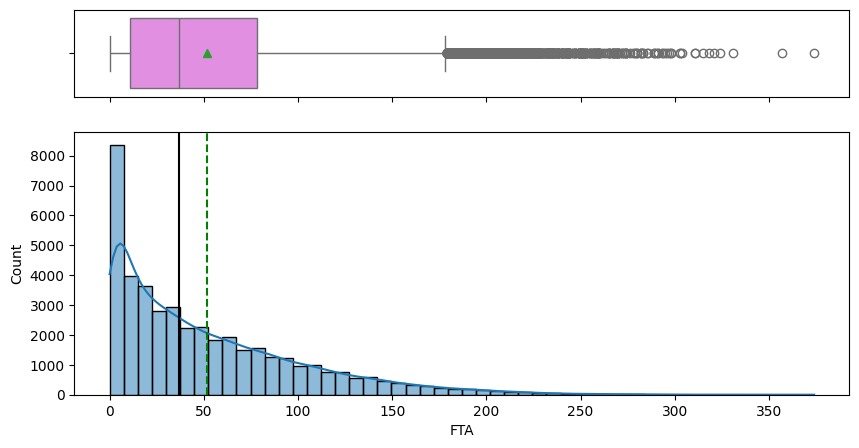

In [34]:
# Distribution of Free Throws Attempt
histogram_boxplot(df_cleaned, num_cols[11], bins=50, kde=True, figsize=(10, 5))

+ Free throws are also rightly skewd with many positive outliers

C:\Users\sovan\AppData\Local\Temp\ipykernel_23304\996613566.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


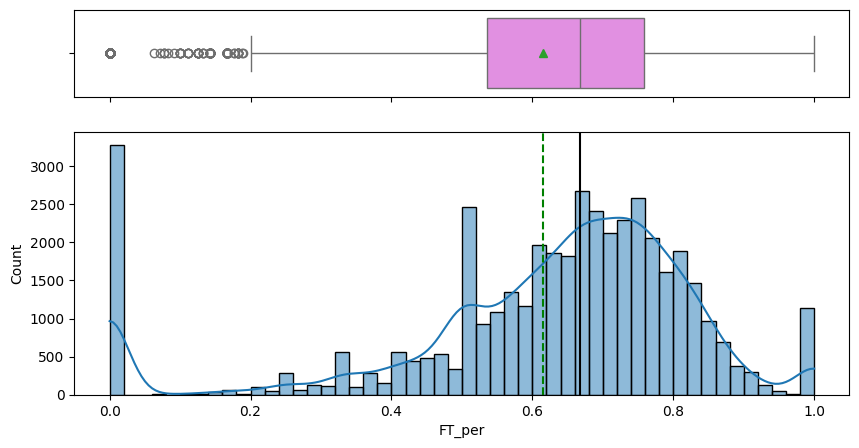

In [35]:
# Distribution of Free Throws Percentage
histogram_boxplot(df_cleaned, num_cols[12], bins=50, kde=True, figsize=(10, 5))

+ Free throws percentage are left skewed

C:\Users\sovan\AppData\Local\Temp\ipykernel_23304\996613566.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


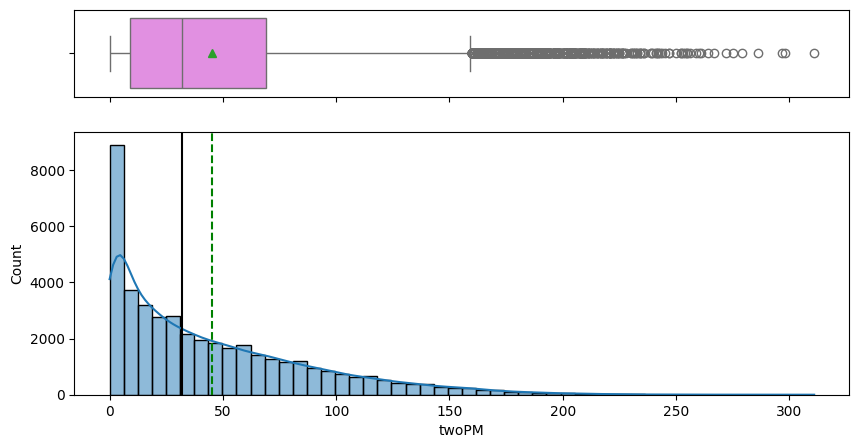

In [36]:
# Distribution of 2 - points field goal made
histogram_boxplot(df_cleaned, num_cols[13], bins=50, kde=True, figsize=(10, 5))

+ 2 point field goals made is left skewed

C:\Users\sovan\AppData\Local\Temp\ipykernel_23304\996613566.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


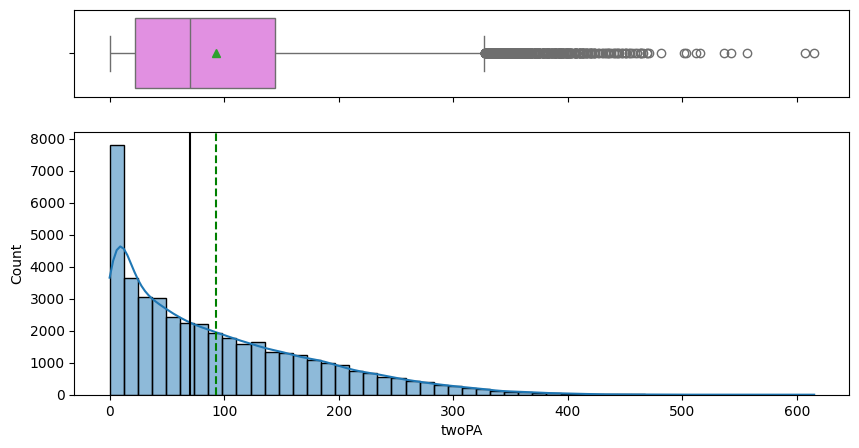

In [37]:
# Distribution of 2 - points field goal attempt
histogram_boxplot(df_cleaned, num_cols[14], bins=50, kde=True, figsize=(10, 5))

+ 2 point field goals attempt is left skewed

C:\Users\sovan\AppData\Local\Temp\ipykernel_23304\996613566.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


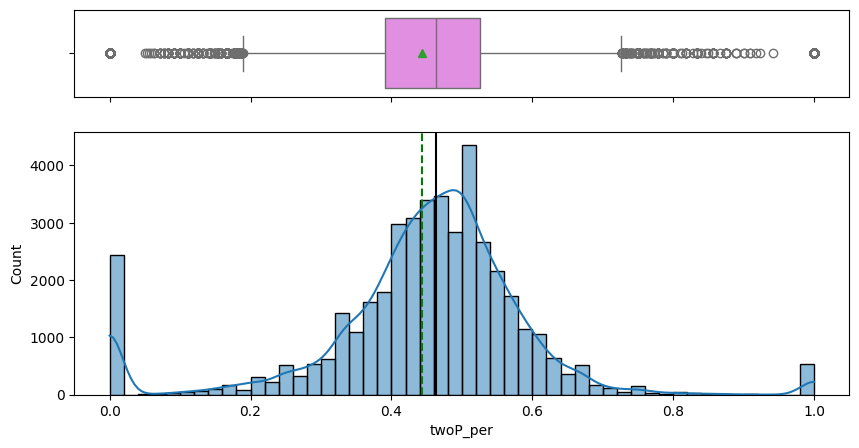

In [38]:
# Distribution of 2 - points field goal percentage
histogram_boxplot(df_cleaned, num_cols[15], bins=50, kde=True, figsize=(10, 5))


+ 2 field goal percentage has both left and right outliers

C:\Users\sovan\AppData\Local\Temp\ipykernel_23304\996613566.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


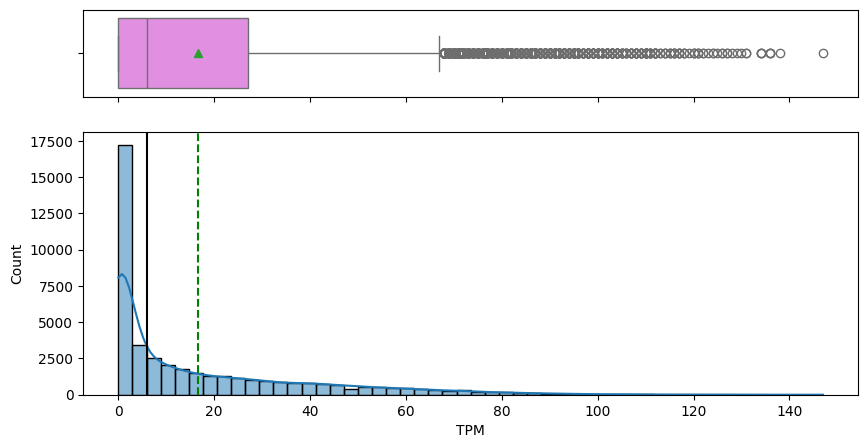

In [39]:
# Distribution of 2 - points field goal percentage
histogram_boxplot(df_cleaned, num_cols[16], bins=50, kde=True, figsize=(10, 5))


C:\Users\sovan\AppData\Local\Temp\ipykernel_23304\996613566.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
C:\Users\sovan\AppData\Local\Temp\ipykernel_23304\996613566.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
C:\Users\sovan\AppData\Local\Temp\ipykernel_23304\996613566.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


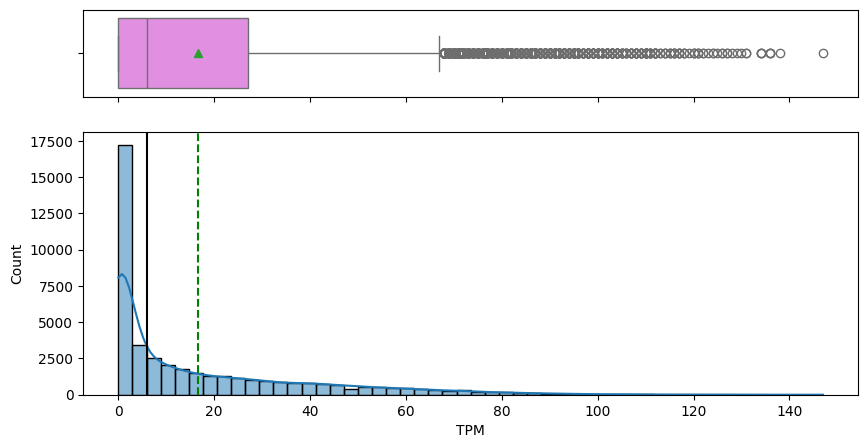

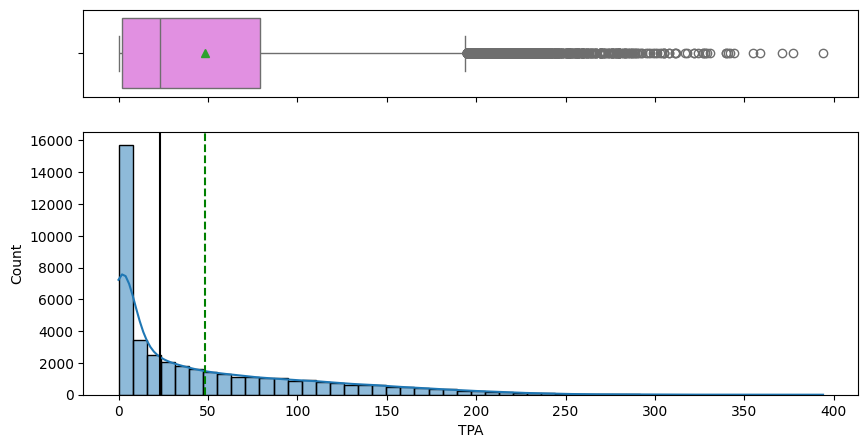

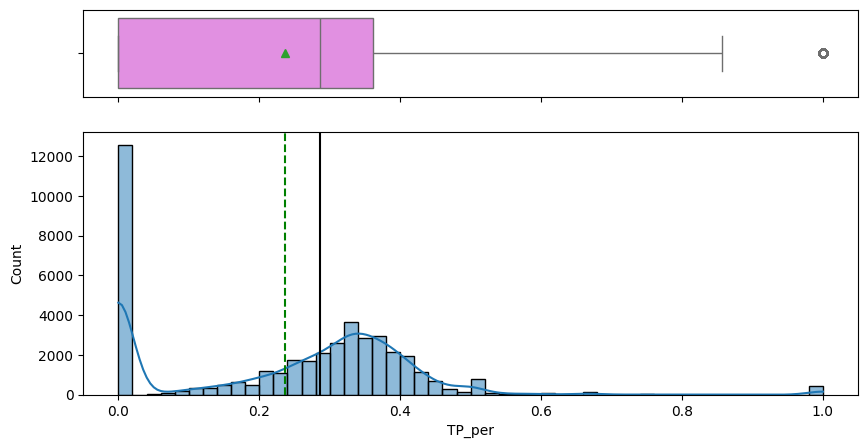

In [40]:
# Distribution of 3 - points field goal made, attempt and percentage
histogram_boxplot(df_cleaned, num_cols[16], bins=50, kde=True, figsize=(10, 5))
histogram_boxplot(df_cleaned, num_cols[17], bins=50, kde=True, figsize=(10, 5))
histogram_boxplot(df_cleaned, num_cols[18], bins=50, kde=True, figsize=(10, 5))

+ All are right skewed with many 0 outliers

C:\Users\sovan\AppData\Local\Temp\ipykernel_23304\996613566.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


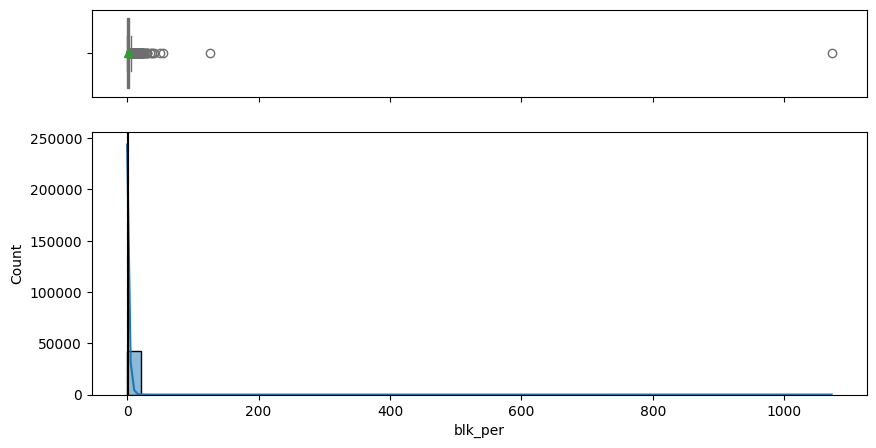

In [41]:
# Distribution of block percentage 
histogram_boxplot(df_cleaned, num_cols[19], bins=50, kde=True, figsize=(10, 5))

+ There are huge outliers that will be likely removed 

C:\Users\sovan\AppData\Local\Temp\ipykernel_23304\996613566.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


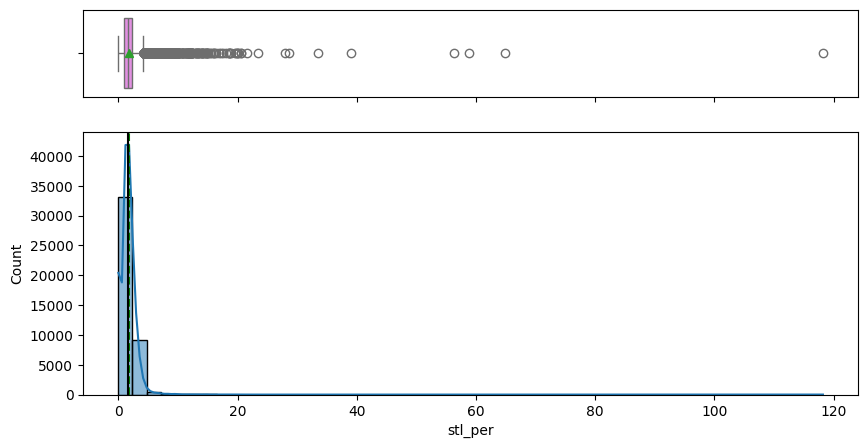

In [42]:
# Distribution of steal percentage 
histogram_boxplot(df_cleaned, num_cols[20], bins=50, kde=True, figsize=(10, 5))

+ steal percentage is skewed to the right

C:\Users\sovan\AppData\Local\Temp\ipykernel_23304\996613566.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


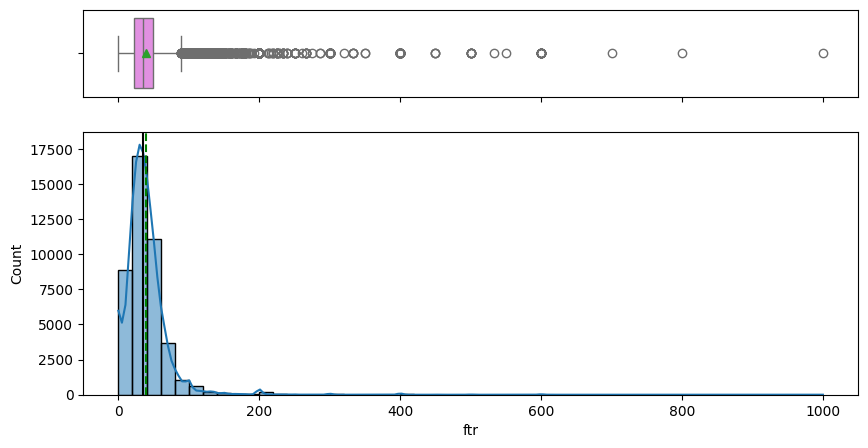

In [43]:
# Distribution of ratio of free throw rate (free throw / field goal)
histogram_boxplot(df_cleaned, num_cols[21], bins=50, kde=True, figsize=(10, 5))

+ Ratio of free throw to free throw attemp are right skewed

C:\Users\sovan\AppData\Local\Temp\ipykernel_23304\996613566.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


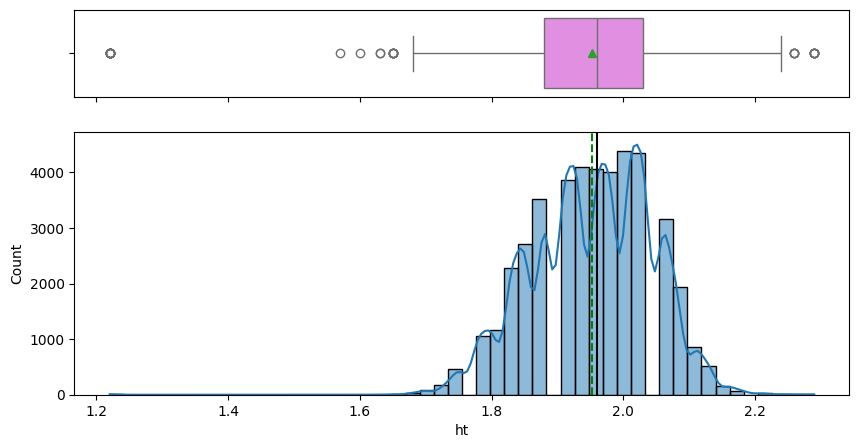

In [44]:
# Distribution of height
histogram_boxplot(df_cleaned, num_cols[22], bins=50, kde=True, figsize=(10, 5))

+ height are left skewed with many left outliers and a few right outliers.

C:\Users\sovan\AppData\Local\Temp\ipykernel_23304\996613566.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


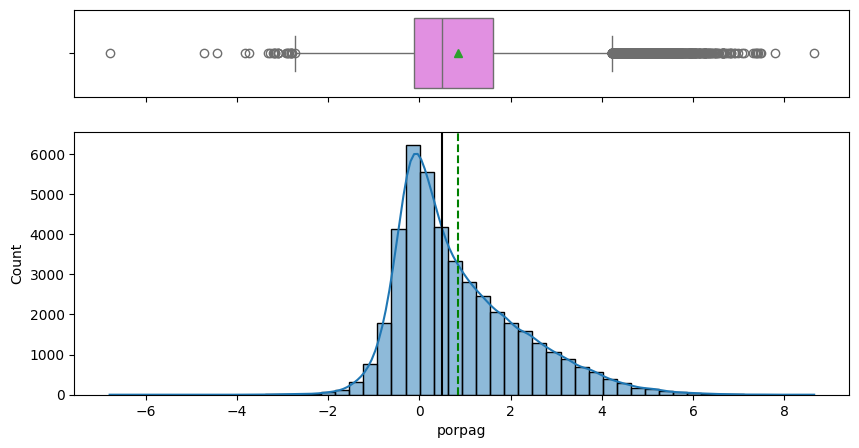

In [45]:
# Distribution of point over replacement 
histogram_boxplot(df_cleaned, num_cols[23], bins=50, kde=True, figsize=(10, 5))

+ Point over replace per adjusted game have more extreme values of lower outliers but more frequent poistive outliers.

C:\Users\sovan\AppData\Local\Temp\ipykernel_23304\996613566.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


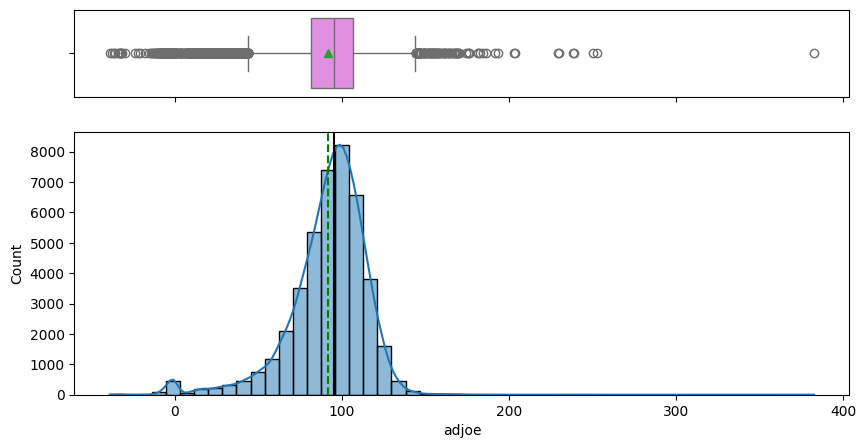

In [46]:
# Distribution of adjusted offensive efficiciency
histogram_boxplot(df_cleaned, num_cols[24], bins=50, kde=True, figsize=(10, 5))

+ Adjusted offensive efficiciency have more extreme positive outliers nnd many left outliers.

C:\Users\sovan\AppData\Local\Temp\ipykernel_23304\996613566.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


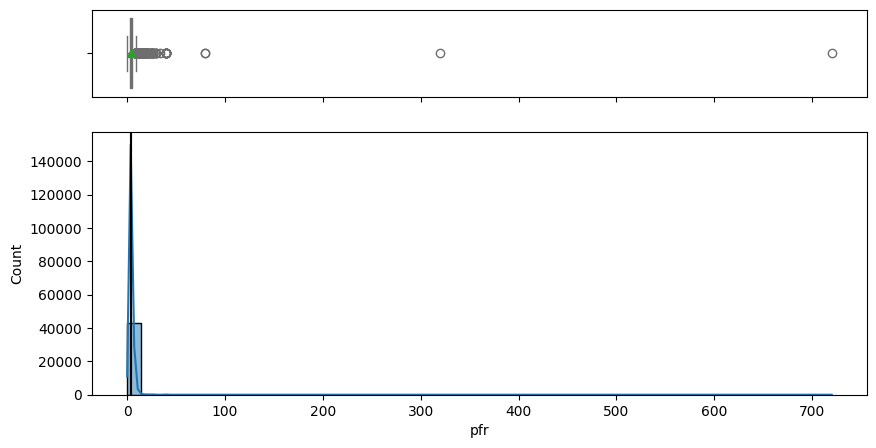

In [47]:
# Distribution of adjusted offensive efficiciency
histogram_boxplot(df_cleaned, num_cols[25], bins=50, kde=True, figsize=(10, 5))

C:\Users\sovan\AppData\Local\Temp\ipykernel_23304\996613566.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


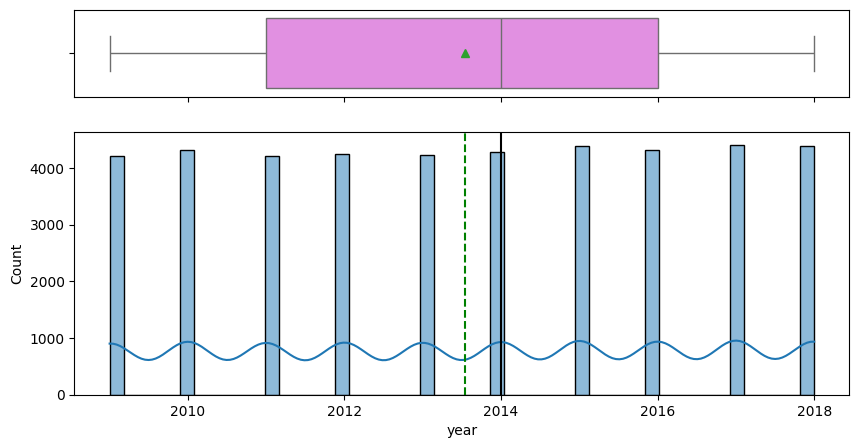

In [48]:
# Distribution of Year
histogram_boxplot(df_cleaned, num_cols[26], bins=50, kde=True, figsize=(10, 5))

C:\Users\sovan\AppData\Local\Temp\ipykernel_23304\996613566.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


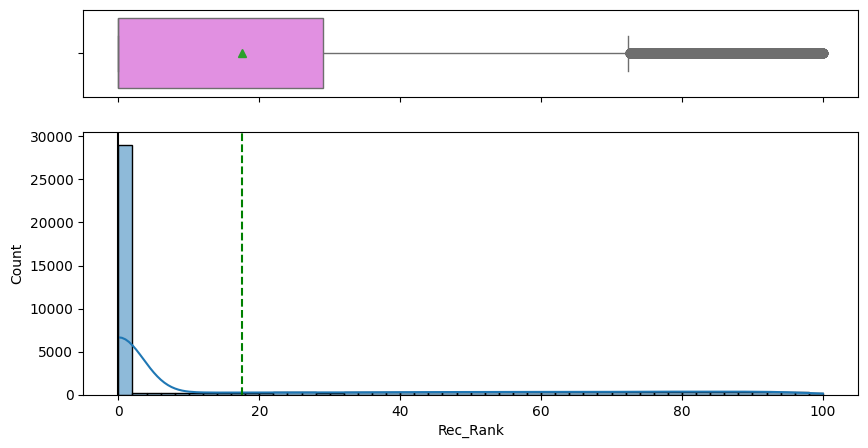

In [49]:
# Distribution of Rec_Rank
histogram_boxplot(df_cleaned, num_cols[27], bins=50, kde=True, figsize=(10, 5))

+ Recruiting rank out of highschool is heavily right skewed

C:\Users\sovan\AppData\Local\Temp\ipykernel_23304\996613566.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


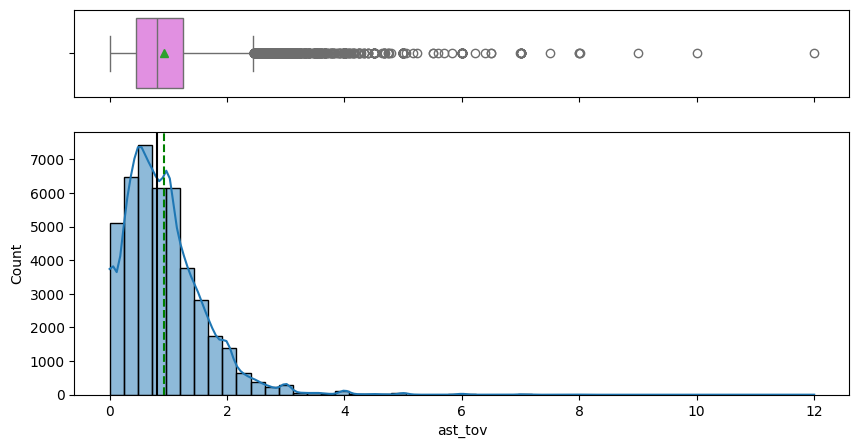

In [50]:
# Distribution of Assist turnover rate
histogram_boxplot(df_cleaned, num_cols[28], bins=50, kde=True, figsize=(10, 5))

+ Assist turnover rate is right skewed

C:\Users\sovan\AppData\Local\Temp\ipykernel_23304\996613566.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


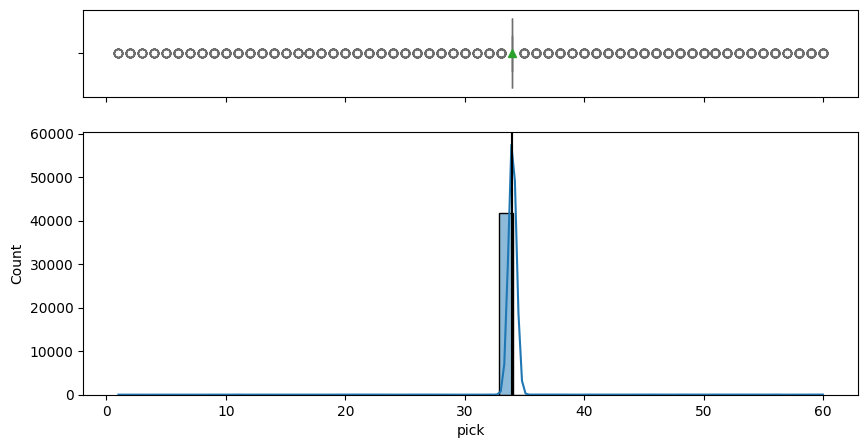

In [51]:
# Distribution of pick
histogram_boxplot(df_cleaned, num_cols[29], bins=50, kde=True, figsize=(10, 5))

+ Most of pick contain missing value which are filled with the median value. Of the non missing value that remain there are outliers on both negative and positive side

C:\Users\sovan\AppData\Local\Temp\ipykernel_23304\996613566.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


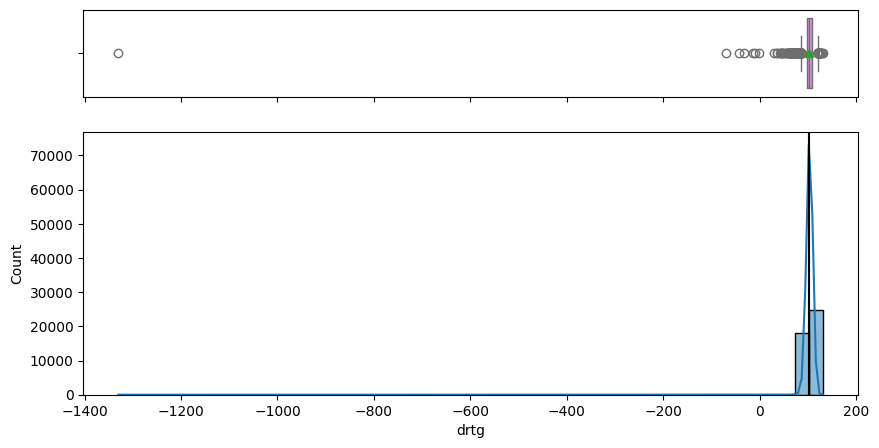

In [52]:
# Distribution of Drtg
histogram_boxplot(df_cleaned, num_cols[30], bins=50, kde=True, figsize=(10, 5))

+ Distribution of defensive rating is heavily skewed to the right 

C:\Users\sovan\AppData\Local\Temp\ipykernel_23304\996613566.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


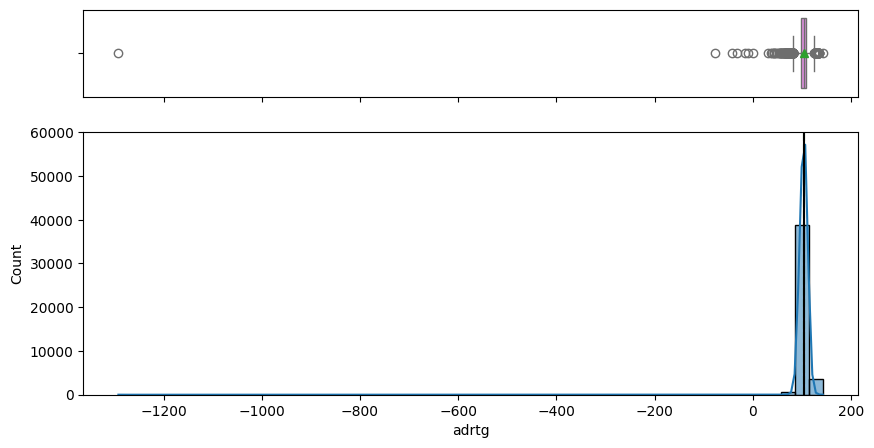

In [53]:
# Distribution of ADrtg
histogram_boxplot(df_cleaned, num_cols[31], bins=50, kde=True, figsize=(10, 5))

+ Adjusted defensive rating has similardistribution to drtg

C:\Users\sovan\AppData\Local\Temp\ipykernel_23304\996613566.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


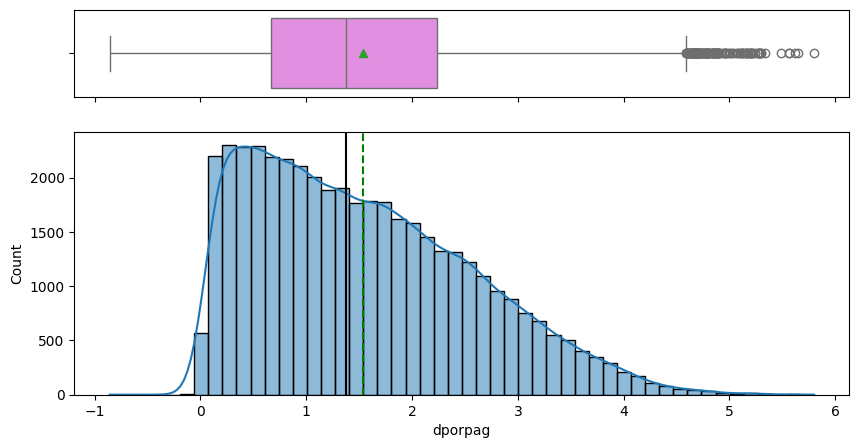

In [54]:
# Distribution of dporpag
histogram_boxplot(df_cleaned, num_cols[32], bins=50, kde=True, figsize=(10, 5))

+ Points Over Replacement Per Adjusted Game (measure of offensive and defensive rating) contain many positive outliers

C:\Users\sovan\AppData\Local\Temp\ipykernel_23304\996613566.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


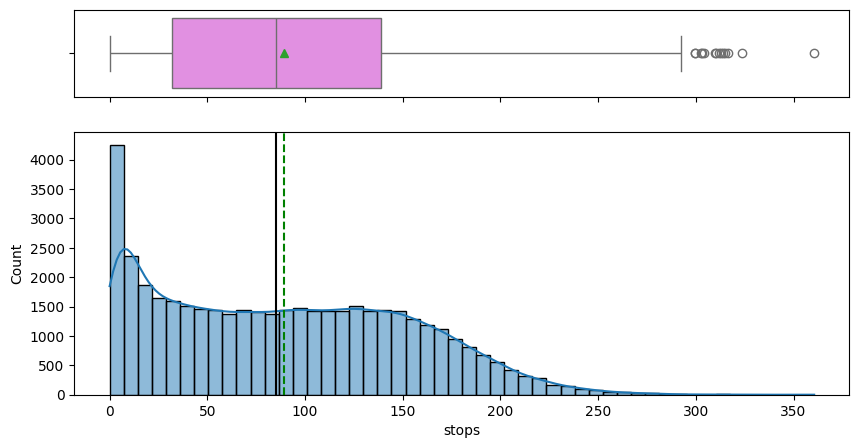

In [55]:
# Distribution of stops
histogram_boxplot(df_cleaned, num_cols[33], bins=50, kde=True, figsize=(10, 5))

+ Measure of defensive stop is right skewed with many positive outliers

C:\Users\sovan\AppData\Local\Temp\ipykernel_23304\996613566.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


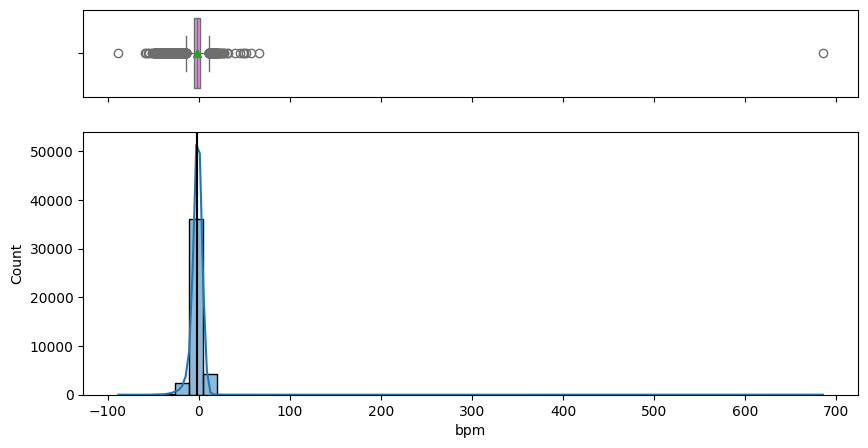

In [56]:
# Distribution of bpm
histogram_boxplot(df_cleaned, num_cols[34], bins=50, kde=True, figsize=(10, 5))

+ Contribution in point above leage averaeg (BPM) have one unrealistic outlier, the rest fairly normal distributed

C:\Users\sovan\AppData\Local\Temp\ipykernel_23304\996613566.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


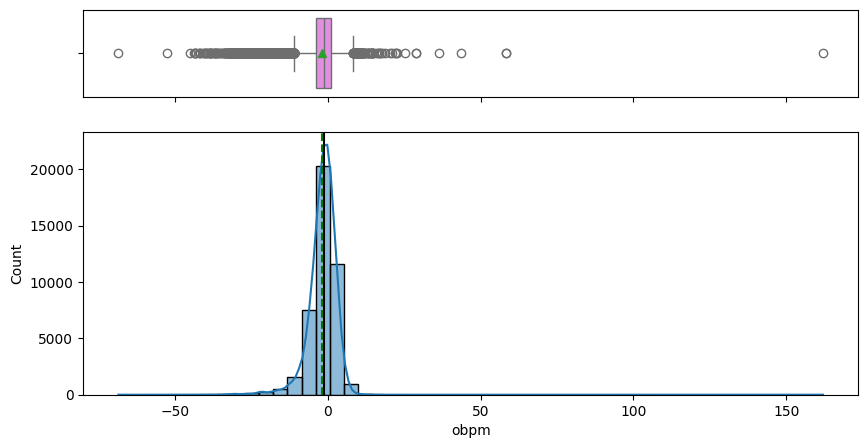

In [57]:
# Distribution of dbpm
histogram_boxplot(df_cleaned, num_cols[35], bins=50, kde=True, figsize=(10, 5))

+ DBPM has the same distribution as BPM

C:\Users\sovan\AppData\Local\Temp\ipykernel_23304\996613566.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


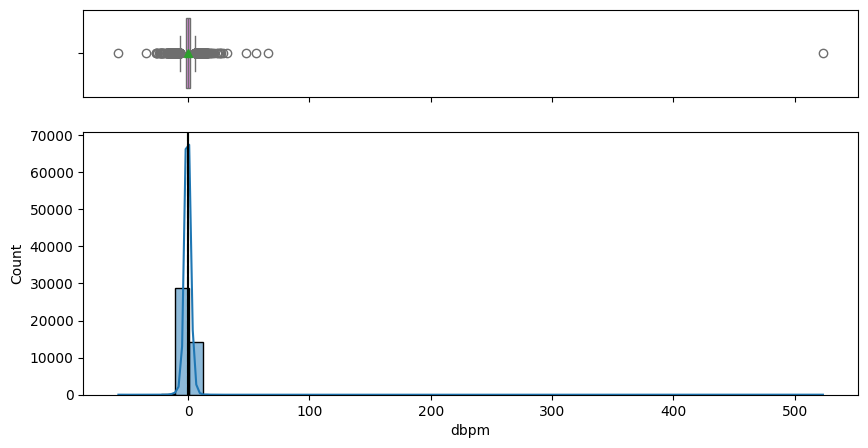

In [58]:
# Distribution of dbpm
histogram_boxplot(df_cleaned, num_cols[36], bins=50, kde=True, figsize=(10, 5))

+ Defensive DBPM 

C:\Users\sovan\AppData\Local\Temp\ipykernel_23304\996613566.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


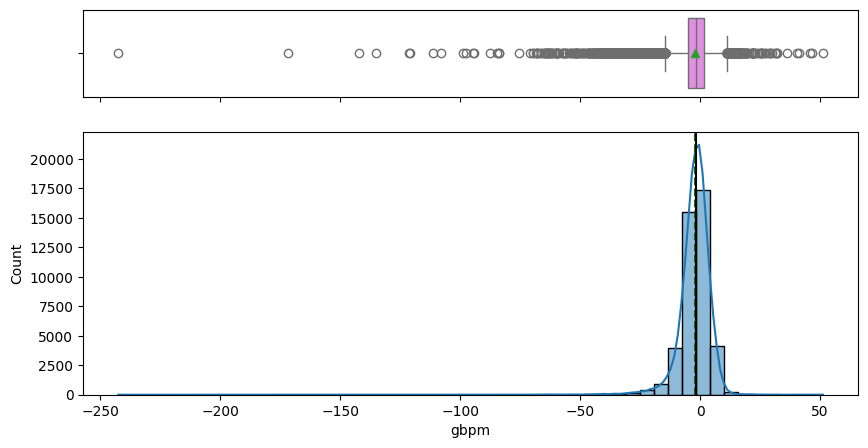

In [59]:
# Distribution of dbpm
histogram_boxplot(df_cleaned, num_cols[37], bins=50, kde=True, figsize=(10, 5))

C:\Users\sovan\AppData\Local\Temp\ipykernel_23304\996613566.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


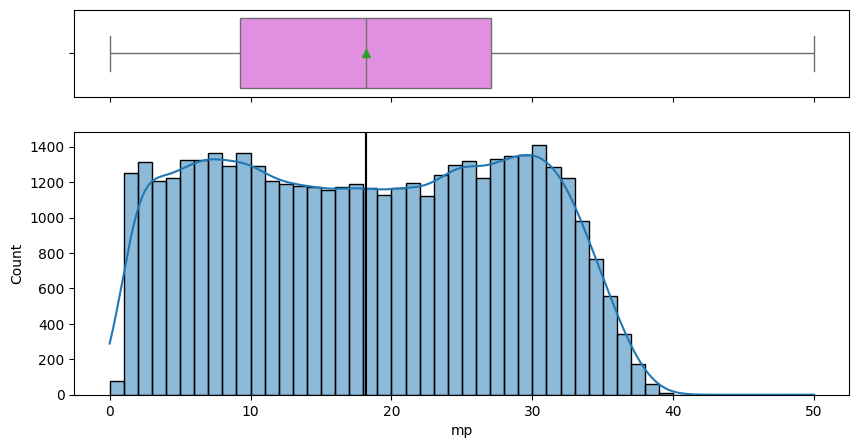

In [60]:
# Distribution of Mp (Minute played)
histogram_boxplot(df_cleaned, num_cols[38], bins=50, kde=True, figsize=(10, 5))

+ Minute played has an M shape distribution

C:\Users\sovan\AppData\Local\Temp\ipykernel_23304\996613566.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


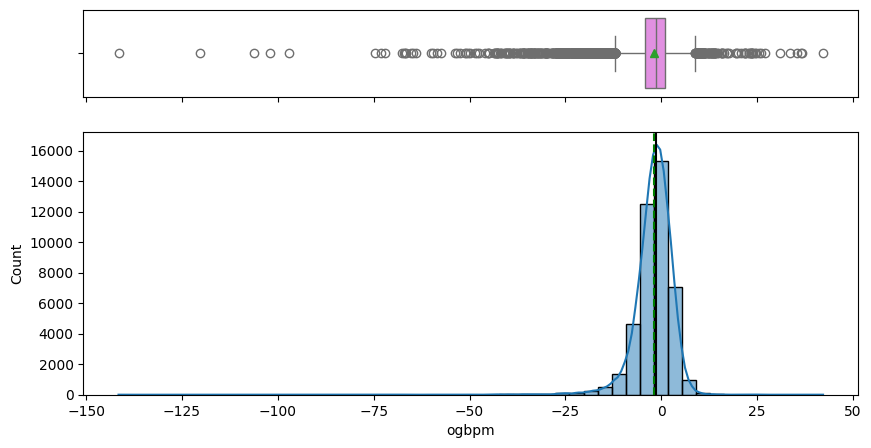

In [61]:
# Distribution of Offensive BPM 
histogram_boxplot(df_cleaned, num_cols[39], bins=50, kde=True, figsize=(10, 5))

+ Offensive BPM is slightly left skewed

C:\Users\sovan\AppData\Local\Temp\ipykernel_23304\996613566.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


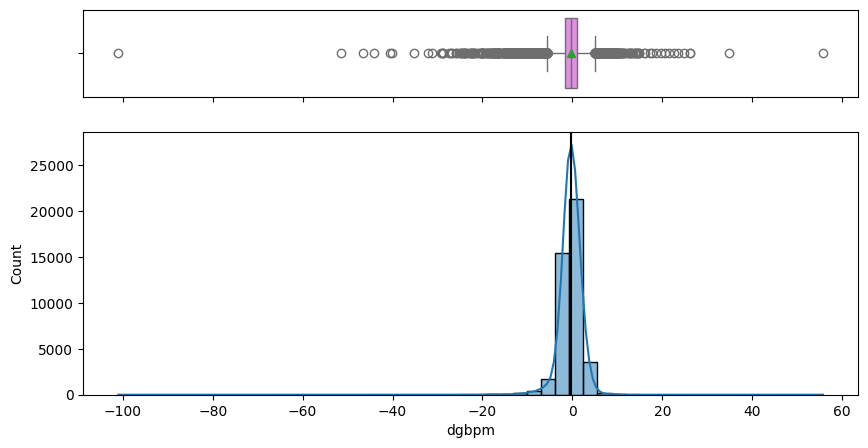

In [62]:
# Distribution of defensive BPM 
histogram_boxplot(df_cleaned, num_cols[40], bins=50, kde=True, figsize=(10, 5))

+ Defensive BPM is fairly normally distributed with outliers on both side

C:\Users\sovan\AppData\Local\Temp\ipykernel_23304\996613566.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


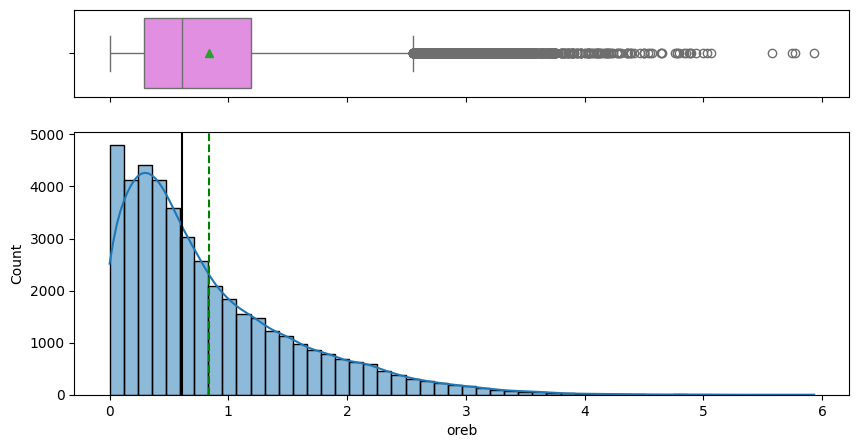

In [63]:
# Distribution of offensive BPM 
histogram_boxplot(df_cleaned, num_cols[41], bins=50, kde=True, figsize=(10, 5))

+ Offensive rebound is right skewed with many high outliers

C:\Users\sovan\AppData\Local\Temp\ipykernel_23304\996613566.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


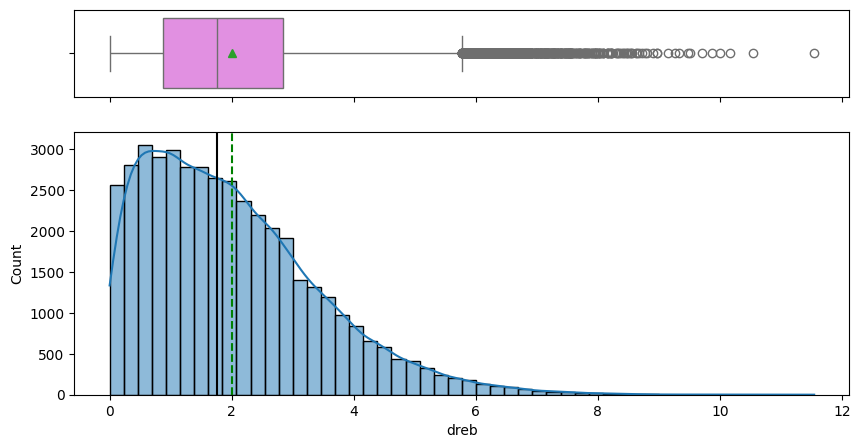

In [64]:
# Distribution of Dffensive rebound
histogram_boxplot(df_cleaned, num_cols[42], bins=50, kde=True, figsize=(10, 5))

+ Defensive rebound is also right skewed with many high outliers

C:\Users\sovan\AppData\Local\Temp\ipykernel_23304\996613566.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


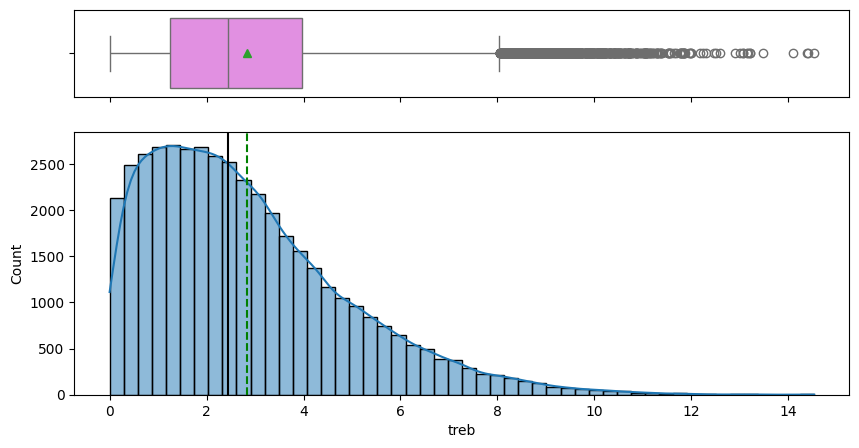

In [65]:
# Distribution of Total rebound
histogram_boxplot(df_cleaned, num_cols[43], bins=50, kde=True, figsize=(10, 5))

+ Total rebound is right skewed with many positive outliers

C:\Users\sovan\AppData\Local\Temp\ipykernel_23304\996613566.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


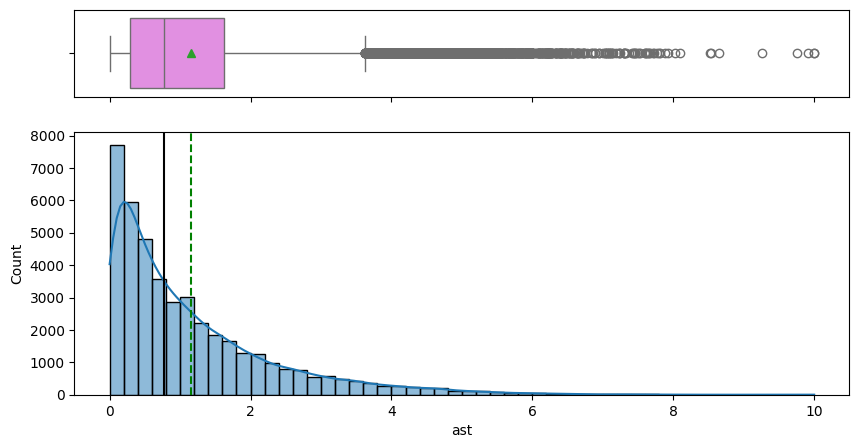

In [66]:
# Distribution of Assist
histogram_boxplot(df_cleaned, num_cols[44], bins=50, kde=True, figsize=(10, 5))

+ Assist is right skewed with many positive outliers

C:\Users\sovan\AppData\Local\Temp\ipykernel_23304\996613566.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


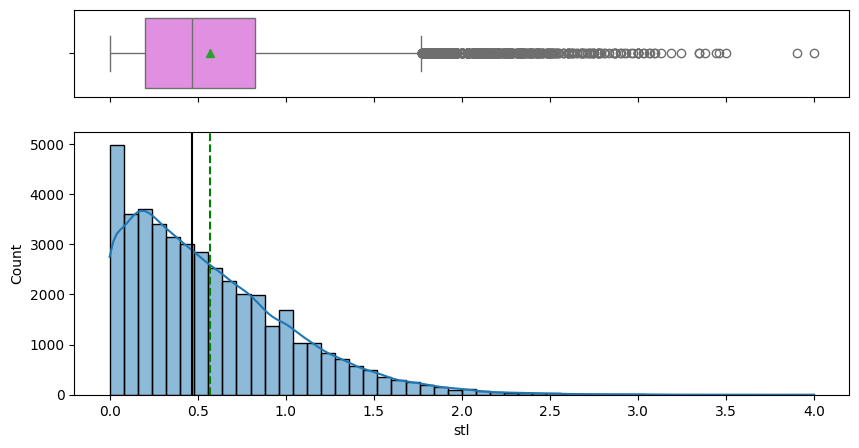

In [67]:
# Distribution of Steal
histogram_boxplot(df_cleaned, num_cols[45], bins=50, kde=True, figsize=(10, 5))

C:\Users\sovan\AppData\Local\Temp\ipykernel_23304\996613566.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


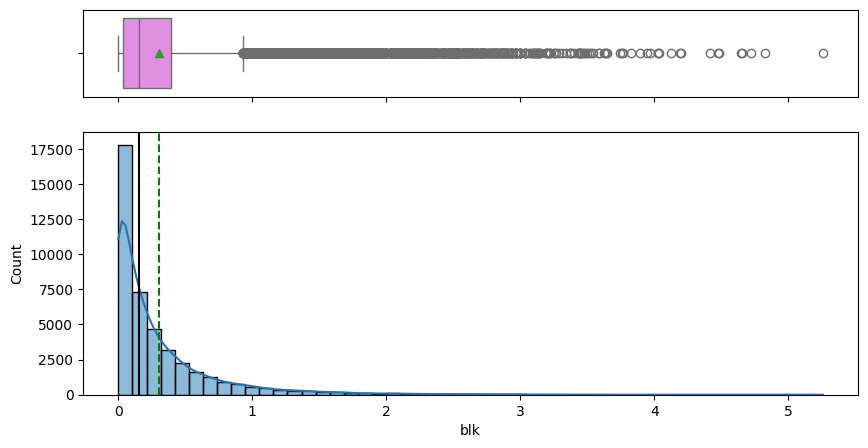

In [68]:
# Distribution of Steal
histogram_boxplot(df_cleaned, num_cols[46], bins=50, kde=True, figsize=(10, 5))

C:\Users\sovan\AppData\Local\Temp\ipykernel_23304\996613566.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


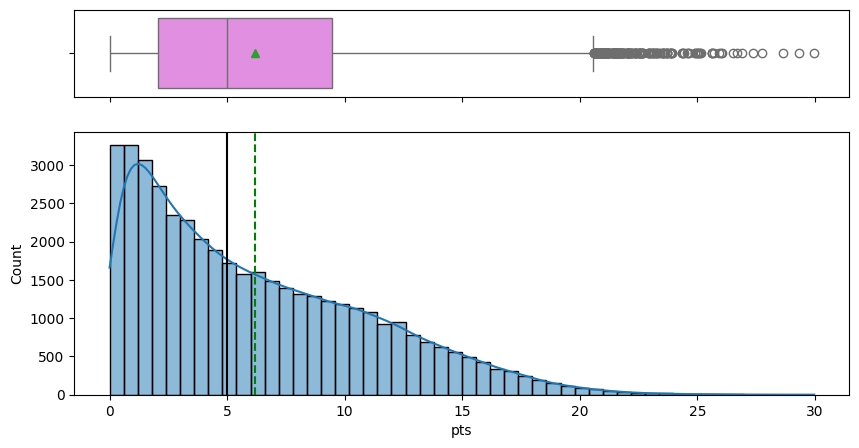

In [69]:
# Distribution of Steal
histogram_boxplot(df_cleaned, num_cols[47], bins=50, kde=True, figsize=(10, 5))

+ Assist, Steals and Blocks are all skewed to the right

### [2.1] Correlation Matrix between dependent variables

In [70]:
num_cols = list(df_cleaned.select_dtypes('number').columns)

In [71]:
correlation_matrix = df_cleaned[num_cols].corr()

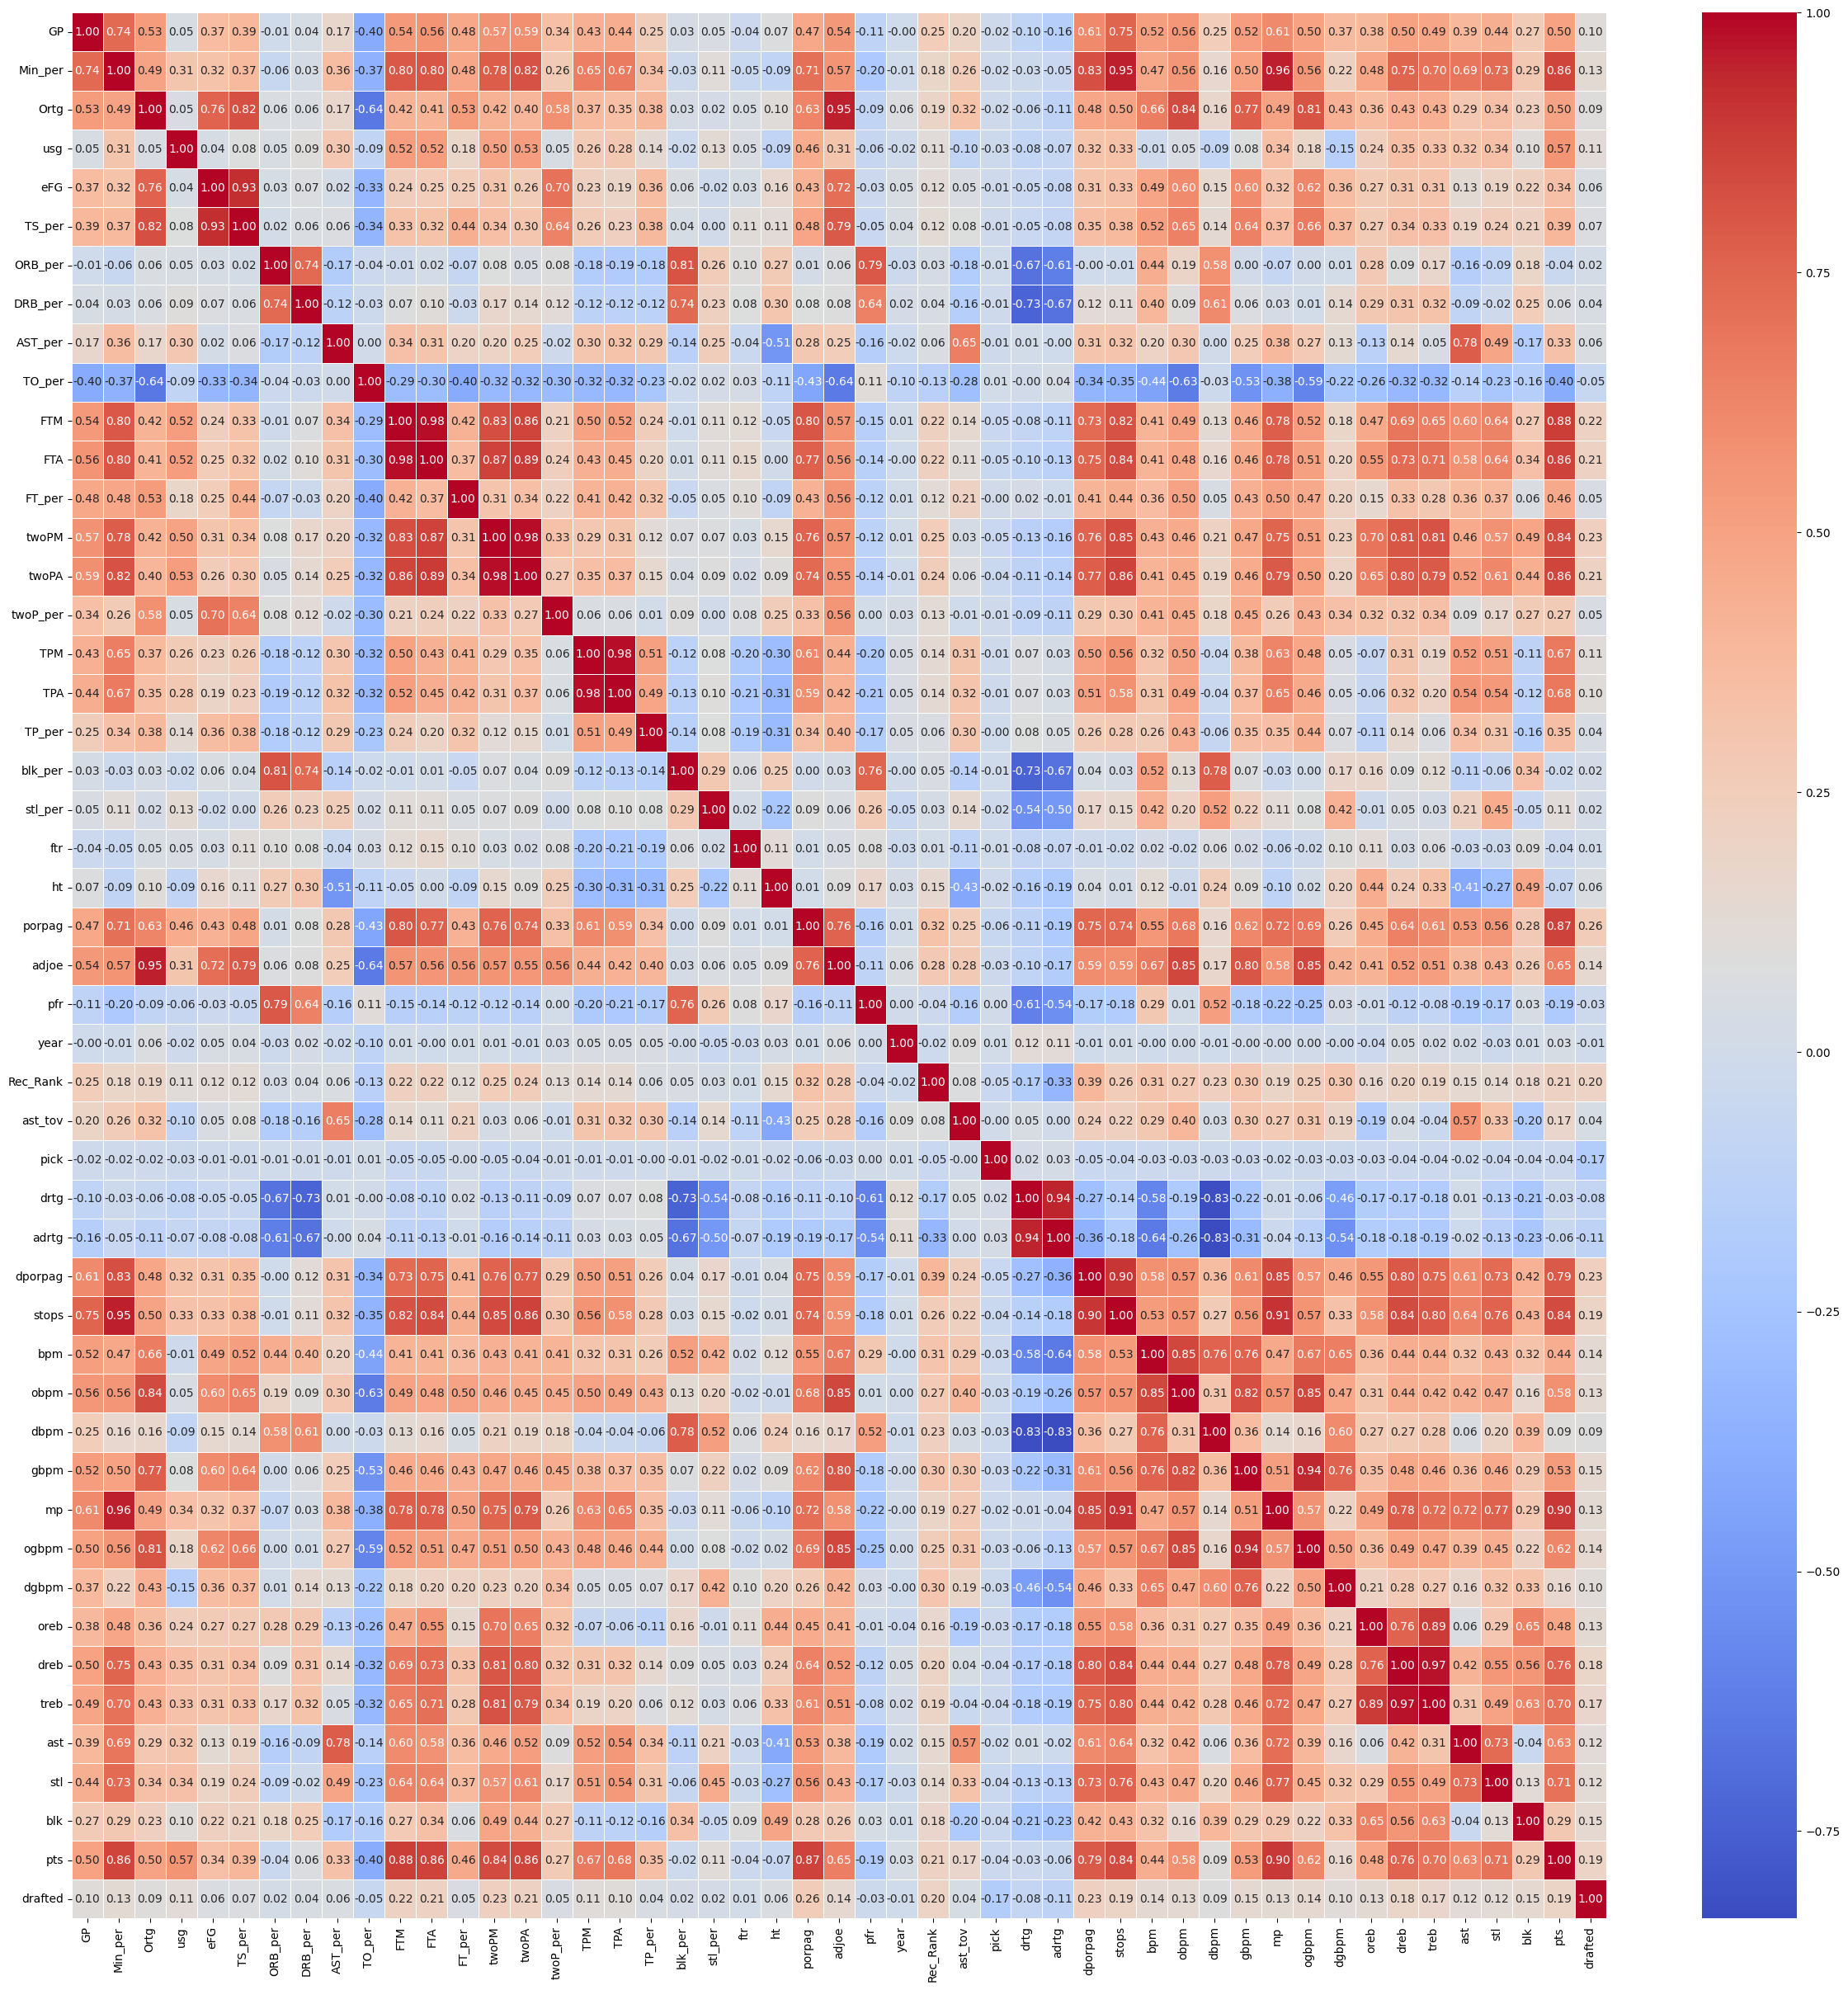

In [72]:
# Set up the matplotlib figure
plt.figure(figsize=(30, 30))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Display the plot
plt.show()

+ Due to the nature of the nba stat there is a lot of correlation between each variables

### [2.2] Analysing Categorical Features

In [73]:
cat_cols = list(set(df_cleaned.columns) - set(df_cleaned[num_cols].columns))

In [74]:
cat_cols

['conf', 'player_id', 'yr', 'type', 'team']

In [24]:
from cstm_pkg_grp_9.features.plots import labeled_barplot

C:\Users\sovan\AppData\Local\pypoetry\Cache\virtualenvs\assignment1-2FZe505k-py3.12\Lib\site-packages\cstm_pkg_grp_9\features\plots.py:241: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


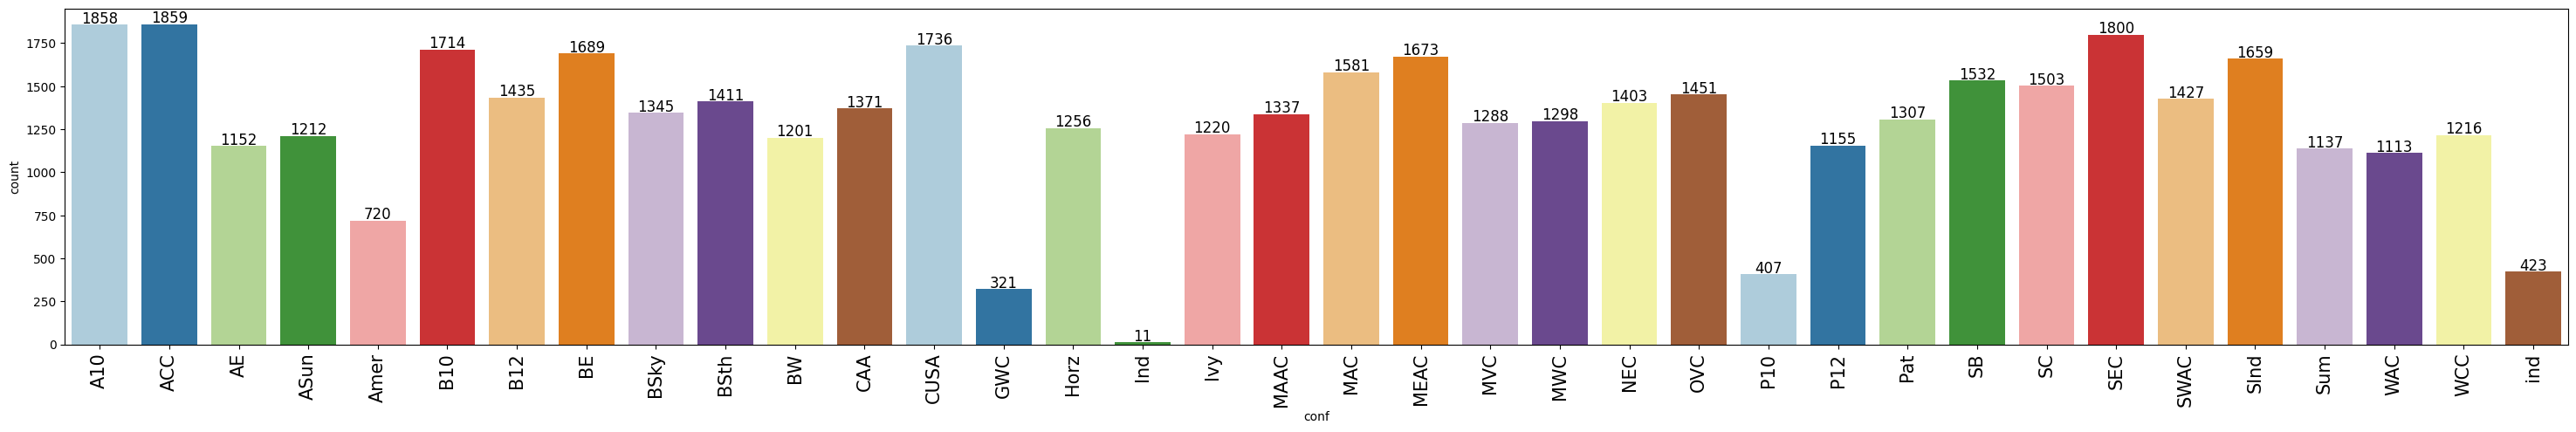

In [25]:
labeled_barplot(df_cleaned, 'conf' )

In [77]:
# Stock conference Vs. drafted
cross_tab = pd.crosstab(df_cleaned['conf'], df_cleaned['drafted'])
print(cross_tab)

drafted   0.0  1.0
conf              
A10      1659    9
ACC      1583   87
AE       1095    0
ASun     1142    0
Amer      650    8
B10      1515   45
B12      1289   54
BE       1484   47
BSky     1265    3
BSth     1320    0
BW       1134    1
CAA      1256    4
CUSA     1587    9
GWC       312    0
Horz     1187    6
Ind        11    0
Ivy      1120    0
MAAC     1242    0
MAC      1459    1
MEAC     1599    1
MVC      1209    2
MWC      1187   13
NEC      1325    0
OVC      1394    5
P10       352   17
P12       986   47
Pat      1193    1
SB       1441    4
SC       1365    2
SEC      1591   64
SWAC     1362    0
Slnd     1575    0
Sum      1071    2
WAC      1059    5
WCC      1125    7
ind       405    0


In [78]:
cross_tab = pd.crosstab(df_cleaned['type'], df_cleaned['drafted'])
print(cross_tab)

drafted    0.0  1.0
type               
all      42549  444


In [83]:
cross_tab = pd.crosstab(df_cleaned['team'], df_cleaned['drafted'])
cross_tab

drafted,0.0,1.0
team,,
Abilene Christian,63,0
Air Force,146,0
Akron,126,0
Alabama,116,1
Alabama A&M,137,0
Alabama St.,141,0
Albany,121,0
Alcorn St.,139,0
American,121,0


In [80]:
cross_tab = pd.crosstab(df_cleaned['yr'], df_cleaned['drafted'])
print(cross_tab)

drafted    0.0  1.0
yr                 
Fr       10901   97
Jr       11617   89
So       10048   97
Sr        9983  161


Key takeaways from bivariate analysis:
1. Some conference ('conf') is associated with the player getting drafted (higher chance).
2. Team does not seem to indicate player getting drafted. ('team' feature should not be included)
3. Seniors are more likely to be drafted. Hence, 'yr' should be included in the model

Key takeaways from EDA:
1. Due to highly correlated variables we should use PCA to help improve predictions.
2. Unrealistic outliers should be removed as PCA is sensitive to outliers

